# Residência em TI - TJGO - Aprendizagem de Máquina - Notebook #1 - Titanic

### Prof. Otávio Calaça Xavier
#### <otaviocx@ufg.br>


### Todos os imports necessários para o projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score

### Configuração de parâmetros

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

### Carregando o dataset de treino

In [3]:
dataset_original = pd.read_csv('https://raw.githubusercontent.com/otaviocx/datasets/main/titanic/train.csv')

# Eliminar o identificador dos passageiros
dataset = dataset_original.drop(['PassengerId'], axis=1)

### Análise exploratória para conhecer o dataset

In [4]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  891 instâncias e  11  atributos.


In [7]:
# .sample() Mostra uma amostra aleatória
# .head() Mostra as primeiras instâncias
# .tail() Mostra as últimas instâncias
dataset.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
195,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
343,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
808,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
799,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S


In [8]:
# Somente atributos numéricos são considerados
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [11]:
# Apenas atributos int e float
numericos = (dataset.select_dtypes(include=['int64', 'float64'])).columns

In [12]:
# Apenas atributos object (string)
categoricos = (dataset.select_dtypes(include=['object'])).columns

# Não considerar os atributos textuais Name, Ticket e Cabin entre os atributos categóricos
categoricos = categoricos.drop(['Name', 'Ticket', 'Cabin'])

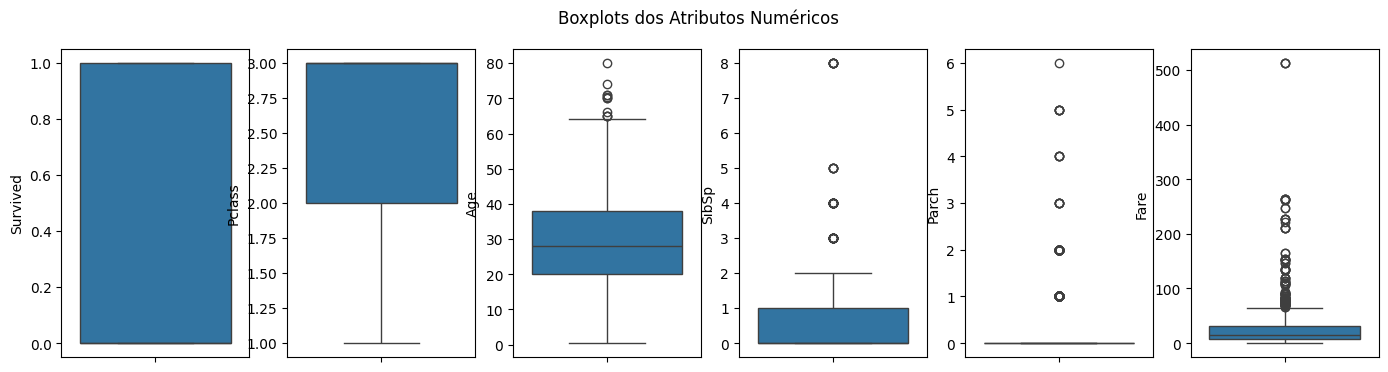

In [13]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Boxplots dos Atributos Numéricos")

# Gráfico para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    sns.boxplot(dataset[feature], ax=ax[i])

Os boxplots acima mostram ainda mais claramente a existência de outliers para Age, SibSp, Parch e Fare, principalmente para as 3 últimas. Em etapas posteriores, pode ser que seja necessário realizar algum tratamento nas instâncias que apresentam esse tipo de comportamento.

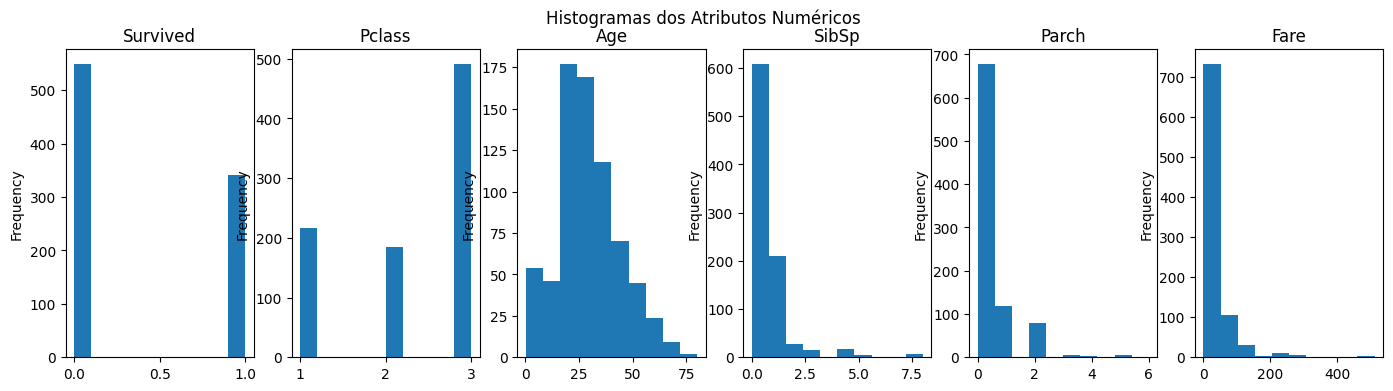

In [14]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Histogramas dos Atributos Numéricos")

# Histograma para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    ax[i].set_title(feature)
    dataset[feature].plot(kind='hist', ax=ax[i])

Analisando as distribuições, temos que:

    Existiam mais passageiros na terceira classe do que nas outras 2
    A variável Age é a que mais se aproxima de uma Distribuição Normal
    SibSp, Parch e Fare possuem, em sua maioria, valores pequenos

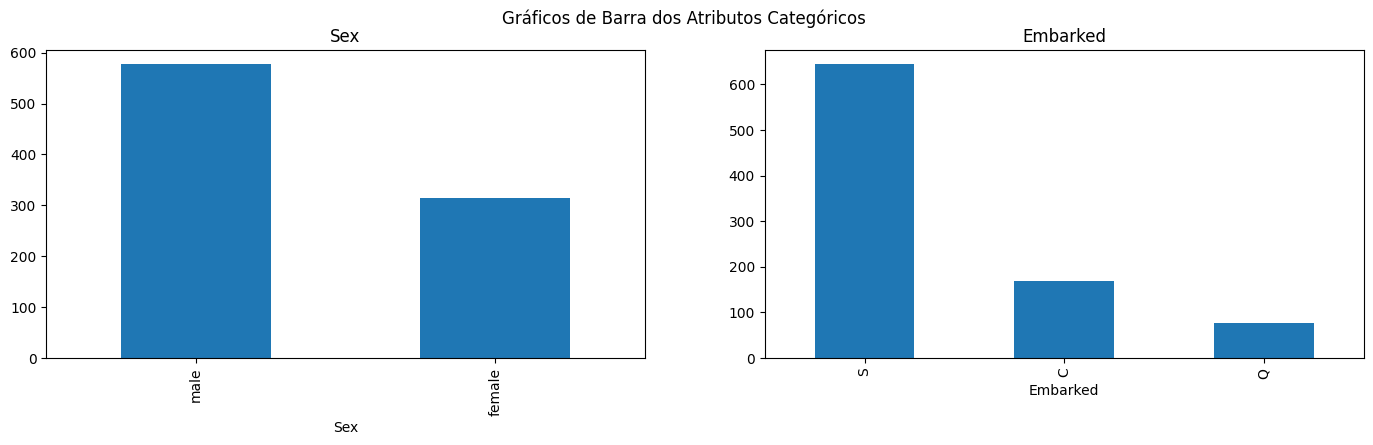

In [15]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

Existiam mais homens do que mulheres a bordo e a maioria dos passageiros embarcaram em "S" (Southampton)


<Axes: >

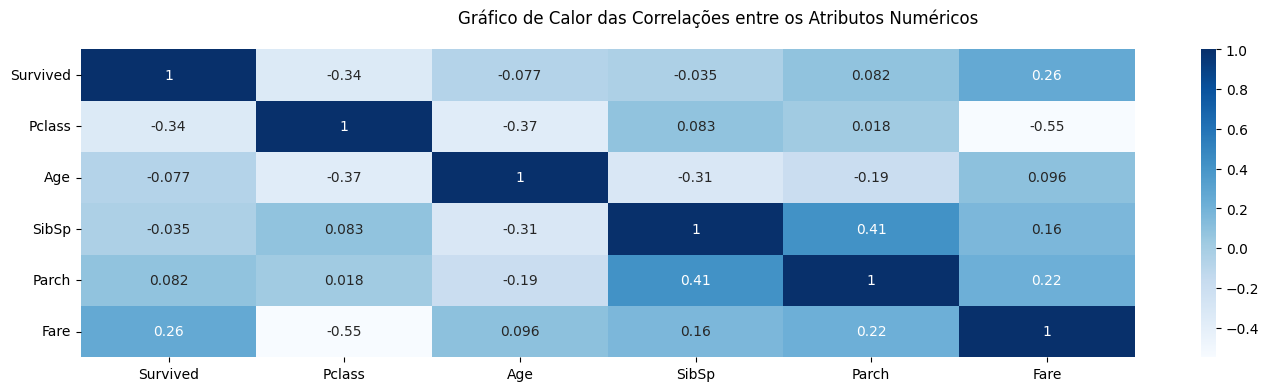

In [16]:
# Somente atributos numéricos são considerados
plt.suptitle("Gráfico de Calor das Correlações entre os Atributos Numéricos")
numeric_dataset = dataset.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='Blues')

O gráfico de calor mostra que as variáveis mais correlacionadas são Pclass e Fare (negativamente) e SibSp e Parch (positivamente).

## Pré-Processamento

In [17]:
dataset_original.shape

(891, 12)

In [18]:
# removendo features que não serão utilizadas no treinamento
dataset = dataset_original.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# divisão do dataset em treino e teste
train, test_split = train_test_split(dataset.copy(), test_size=0.3)

In [20]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         120
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
# Para as instâncias onde Age é nulo, imputar a média (29.97)
train.loc[train['Age'].isnull(), 'Age'] = train['Age'].mean()

In [22]:
# Para as instâncias onde Embarked é nulo, imputar a moda (S)
train.loc[train['Embarked'].isnull(), 'Embarked'] = (train.mode())['Embarked'][0]

# normalizando os dados
train = pd.get_dummies(train)

# Evitar dummy trap excluindo valores de referência
train.drop(['Sex_male', 'Embarked_S'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
633,0,1,29.317932,0,0,0.0000,False,False,False
514,0,3,24.000000,0,0,7.4958,False,False,False
22,1,3,15.000000,0,0,8.0292,True,False,True
63,0,3,4.000000,3,2,27.9000,False,False,False
631,0,3,51.000000,0,0,7.0542,False,False,False


In [23]:
# separando o target do treinamento
X = train.drop(['Survived'], axis=1)
y = train['Survived']

### Treinamento do modelo

In [24]:
# treinamento do modelo com Random Forest
model = RandomForestClassifier(random_state=1)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Avaliação do modelo com o dataframe de testes

In [25]:
y_pred = model.predict(X)

In [26]:
# acurácia
accuracy_score(y, y_pred)

0.9871589085072231

In [27]:
# Imputar valores nulos usando padrões do conjunto de treino
test_split.loc[test_split['Age'].isnull(), 'Age'] = 29.97
test_split.loc[test_split['Embarked'].isnull(), 'Embarked'] = 'S'

# Transformar variáveis categóricas
test_split = pd.get_dummies(test_split)
test_split.drop(['Embarked_S', 'Sex_male'], inplace=True, axis=1)

In [28]:
test_split.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
18,0,3,31.00,1,0,18.0000,True,False,False
263,0,1,40.00,0,0,0.0000,False,False,False
739,0,3,29.97,0,0,7.8958,False,False,False
832,0,3,29.97,0,0,7.2292,False,True,False
246,0,3,25.00,0,0,7.7750,True,False,False


In [29]:
X_test = test_split.drop(['Survived'], axis=1)
y_test = test_split['Survived']

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.8283582089552238

Analisar o Notebook do Titanic e modificá-lo em busca de melhorar o resultado do modelo de machine learning

In [32]:
# 1) Como a ideia é melhorar, estou copiando o dataset original para um DF novo (assim não mexo no que já estava feito)

dados = dataset_original.copy()

# Tirar o PassengerId do jogo (não ajuda a prever a sobrevivência)
dados = dados.drop(columns=['PassengerId'])

# Feature engineering básica

# Tamanho da família: irmãos/cônjuge + pais/filhos + a própria pessoa
dados['FamilySize'] = dados['SibSp'] + dados['Parch'] + 1

# Flag de quem está viajando sozinho
dados['IsAlone'] = (dados['FamilySize'] == 1).astype(int)

# Saber se a cabine é conhecida ou não (vira um indicador simples)
dados['CabinKnown'] = dados['Cabin'].notnull().astype(int)

# Título (Mr, Mrs, Miss, etc.) - costuma ser uma feature forte no Titanic
dados['Title'] = dados['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupando alguns títulos raros em uma categoria só
rare_titles = [
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
    'Sir', 'Jonkheer', 'Dona'
]

dados['Title'] = dados['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})
dados['Title'] = dados['Title'].replace(rare_titles, 'Rare')

dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CabinKnown,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,Mr


In [33]:
# 2) Tratando valores faltantes

# Age: em vez de uma única média, vou usar a mediana por Pclass + Sex
# Isso geralmente deixa as idades imputadas mais "realistas"
idade_mediana_grupo = dados.groupby(['Pclass', 'Sex'])['Age'].transform('median')
dados['Age'] = dados['Age'].fillna(idade_mediana_grupo)

# Se sobrar algum NaN em Age por algum motivo, uso a mediana global como backup
dados['Age'] = dados['Age'].fillna(dados['Age'].median())

# Embarked: preenche com a moda (valor mais frequente)
dados['Embarked'] = dados['Embarked'].fillna(dados['Embarked'].mode()[0])

# Fare: às vezes também tem NaN, garanto que não fique faltante
dados['Fare'] = dados['Fare'].fillna(dados['Fare'].median())

dados.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
FamilySize      0
IsAlone         0
CabinKnown      0
Title           0
dtype: int64

In [35]:
# 3) Selecionando colunas finais e transformando categóricas em dummies

colunas_para_dropar = ['Name', 'Ticket', 'Cabin']  # já extraí Title e CabinKnown
dados_modelo = dados.drop(columns=colunas_para_dropar)

# Transformar variáveis categóricas em dummies
# drop_first=True evita o "dummy trap" (uma categoria vira referência)
dados_modelo = pd.get_dummies(
    dados_modelo,
    columns=['Sex', 'Embarked', 'Title'],
    drop_first=True
)

dados_modelo.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinKnown,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,2,0,0,True,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,0,1,False,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,1,0,False,False,True,True,False,False,False
3,1,1,35.0,1,0,53.1000,2,0,1,False,False,True,False,False,True,False
4,0,3,35.0,0,0,8.0500,1,1,0,True,False,True,False,True,False,False


In [36]:
# 4) Separando features (X) e target (y) + criando conjunto de validação

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

X = dados_modelo.drop('Survived', axis=1)
y = dados_modelo['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,        # mantém proporção de classes
    random_state=42
)

X_train.shape, X_valid.shape

((712, 15), (179, 15))

In [37]:
# 5) Random Forest mais afinado + validação cruzada

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Começo com um RF mais "forte" que o padrão, mas sem exagerar
rf_basico = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Validação cruzada estratificada em cima do dataset inteiro
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_basico, X, y, cv=cv, scoring='accuracy')

print(f"Acurácia média (CV 5-fold): {scores.mean():.4f} (+/- {scores.std():.4f})")

# Agora treino no conjunto de treino e avaliamos no conjunto de validação
rf_basico.fit(X_train, y_train)
pred_valid = rf_basico.predict(X_valid)

print("\nAcurácia no conjunto de validação:", accuracy_score(y_valid, pred_valid))

print("\nRelatório de classificação:")
print(classification_report(y_valid, pred_valid))

print("\nMatriz de confusão:")
pd.crosstab(y_valid, pred_valid, rownames=['Real'], colnames=['Predito'])

Acurácia média (CV 5-fold): 0.8294 (+/- 0.0094)

Acurácia no conjunto de validação: 0.8324022346368715

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


Matriz de confusão:


Predito,0,1
Real,,
0,99,11
1,19,50


In [38]:
# 6) Aqui, busco os hiperparâmetros com RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 5, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

busca_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=30,              # quantidade de combinações a testar
    cv=cv,                  # o mesmo StratifiedKFold lá de cima
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

busca_rf.fit(X_train, y_train)

print("Melhores hiperparâmetros encontrados:")
print(busca_rf.best_params_)

melhor_rf = busca_rf.best_estimator_

pred_valid_melhor = melhor_rf.predict(X_valid)

print("\nAcurácia no conjunto de validação (modelo tunado):",
      accuracy_score(y_valid, pred_valid_melhor))

print("\nRelatório de classificação (modelo tunado):")
print(classification_report(y_valid, pred_valid_melhor))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores hiperparâmetros encontrados:
{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}

Acurácia no conjunto de validação (modelo tunado): 0.8100558659217877

Relatório de classificação (modelo tunado):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# # Salvando o modelo final 
# joblib.dump(melhor_rf, 'modelo_titanic_rf_melhor.sav')

### Avaliação dos modelos e comparação de resultados

Nesta etapa eu testei algumas melhorias no modelo de classificação de sobreviventes do Titanic, em relação ao modelo inicial que usava um `RandomForestClassifier` com configurações padrão e um pré-processamento mais simples. A acurácia de referência do modelo antigo era de aproximadamente **0,8283** no conjunto de teste.

As principais mudanças que eu fiz foram:

- **Feature engineering**:
  - Criei as variáveis `FamilySize` (tamanho da família a bordo), `IsAlone` (indicador de passageiro sozinho), `CabinKnown` (se a cabine é conhecida ou não) e `Title` (título extraído do nome, como *Mr*, *Mrs*, *Miss* etc.).
- **Tratamento de valores faltantes**:
  - Preenchi `Age` usando a mediana por combinação de `Pclass` e `Sex`, deixando as idades imputadas mais coerentes com o perfil do passageiro.
  - Preenchi `Embarked` com a moda e `Fare` com a mediana.
- **Codificação de variáveis categóricas**:
  - Transformei `Sex`, `Embarked` e `Title` em variáveis dummies.
- **Validação mais robusta**:
  - Usei **validação cruzada estratificada (5-fold)** para estimar o desempenho médio do modelo.

Com esse novo conjunto de features e tratamento de dados, eu treinei dois modelos principais:

1. **Random Forest “básico melhorado”**  
   - Ajustei manualmente alguns hiperparâmetros (`n_estimators=200`, `max_depth=6`, etc.).
   - Acurácia média na validação cruzada (5-fold): **0,8294 ± 0,0094**.  
   - Acurácia no conjunto de validação: **0,8324**.  
   - Para a classe positiva (1 = sobreviveu), o modelo apresentou:
     - *precision* ≈ **0,82**
     - *recall* ≈ **0,72**
     - *f1-score* ≈ **0,77**

   Esses resultados mostram uma leve melhora em relação ao modelo original (0,8324 vs 0,8283). A matriz de confusão indica que o modelo ainda erra alguns sobreviventes (falsos negativos), mas consegue capturar uma boa parte deles.

2. **Random Forest com hiperparâmetros otimizados (RandomizedSearchCV)**  
   - Em seguida, eu rodei uma busca aleatória de hiperparâmetros (número de árvores, profundidade máxima, tamanho mínimo de folhas, etc.) usando a mesma validação cruzada estratificada.
   - Os melhores hiperparâmetros encontrados foram, por exemplo:
     - `n_estimators = 300`
     - `max_depth = 5`
     - `min_samples_split = 4`
     - `min_samples_leaf = 1`
     - `max_features = 'log2'`
   - Acurácia no conjunto de validação com o modelo tunado: **0,8106**.

Apesar de a busca de hiperparâmetros ter sido feita corretamente, esse modelo tunado não superou o desempenho do Random Forest básico melhorado neste conjunto de validação (0,8106 vs 0,8324). Isso é relativamente comum: a seleção é feita com base na média dos folds da validação cruzada, e o comportamento pode variar quando eu avalio em um conjunto de validação separado. Além disso, diferenças pequenas de acurácia podem estar dentro da variação natural do problema, dado o tamanho do dataset.

### Conclusão

- O modelo com **feature engineering + Random Forest básico ajustado manualmente** acabou ficando ligeiramente melhor que o modelo original e que o modelo tunado via `RandomizedSearchCV`.
- Por isso, **eu optei por adotar como modelo final o Random Forest básico melhorado**, que:
  - Usa features mais informativas (títulos, tamanho da família, indicador de estar sozinho, etc.).
  - Mantém uma boa acurácia (~0,83) e um f1-score razoável para a classe de sobreviventes.
  - É mais simples de entender e reproduzir do que o modelo resultante da busca automática de hiperparâmetros.

Em um cenário real, meu próximo passo natural seria testar outros algoritmos (por exemplo, *Gradient Boosting*, *XGBoost* ou *LightGBM*) e comparar novamente as métricas, sempre mantendo o mesmo esquema de validação para ter uma comparação justa.